# REGRESIÓN POLINÓMICA 

En este cuaderno quiero prácticar la regresión polinómica, con un modelo simple y un modelo múltiple. Para ello, vamos a intentar inferir el precio de un conjunto de coches basandonos en distintas variables. 

### Importamos las librerias

In [1]:
# Manejo de datos
import pandas as pd
import numpy as np

# Gráficos
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocesado de datos y modelado 
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

### Abrir la base de datos

In [2]:
data= pd.read_csv("automovile.csv")

In [3]:
### Echar un vistazo a la base de datos y los campos que tiene

In [4]:
data.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [5]:
data.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,197.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,0.837102,0.915126,53.766667,2555.666667,126.875622,3.330692,3.256904,10.164279,103.405534,5117.665368,25.179104,30.686567,13207.129353,9.944145,0.099502,0.900498
std,1.254802,31.99625,6.066366,0.059213,0.029187,2.447822,517.296727,41.546834,0.268072,0.319256,4.004965,37.365700,478.113805,6.423220,6.815150,7947.066342,2.534599,0.300083,0.300083
min,-2.000000,65.00000,86.600000,0.678039,0.837500,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,4.795918,0.000000,0.000000
25%,0.000000,101.00000,94.500000,0.801538,0.890278,52.000000,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000,7.833333,0.000000,1.000000
50%,1.000000,122.00000,97.000000,0.832292,0.909722,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5125.369458,24.000000,30.000000,10295.000000,9.791667,0.000000,1.000000
75%,2.000000,137.00000,102.400000,0.881788,0.925000,55.500000,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000,12.368421,0.000000,1.000000
max,3.000000,256.00000,120.900000,1.000000,1.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000,18.076923,1.000000,1.000000


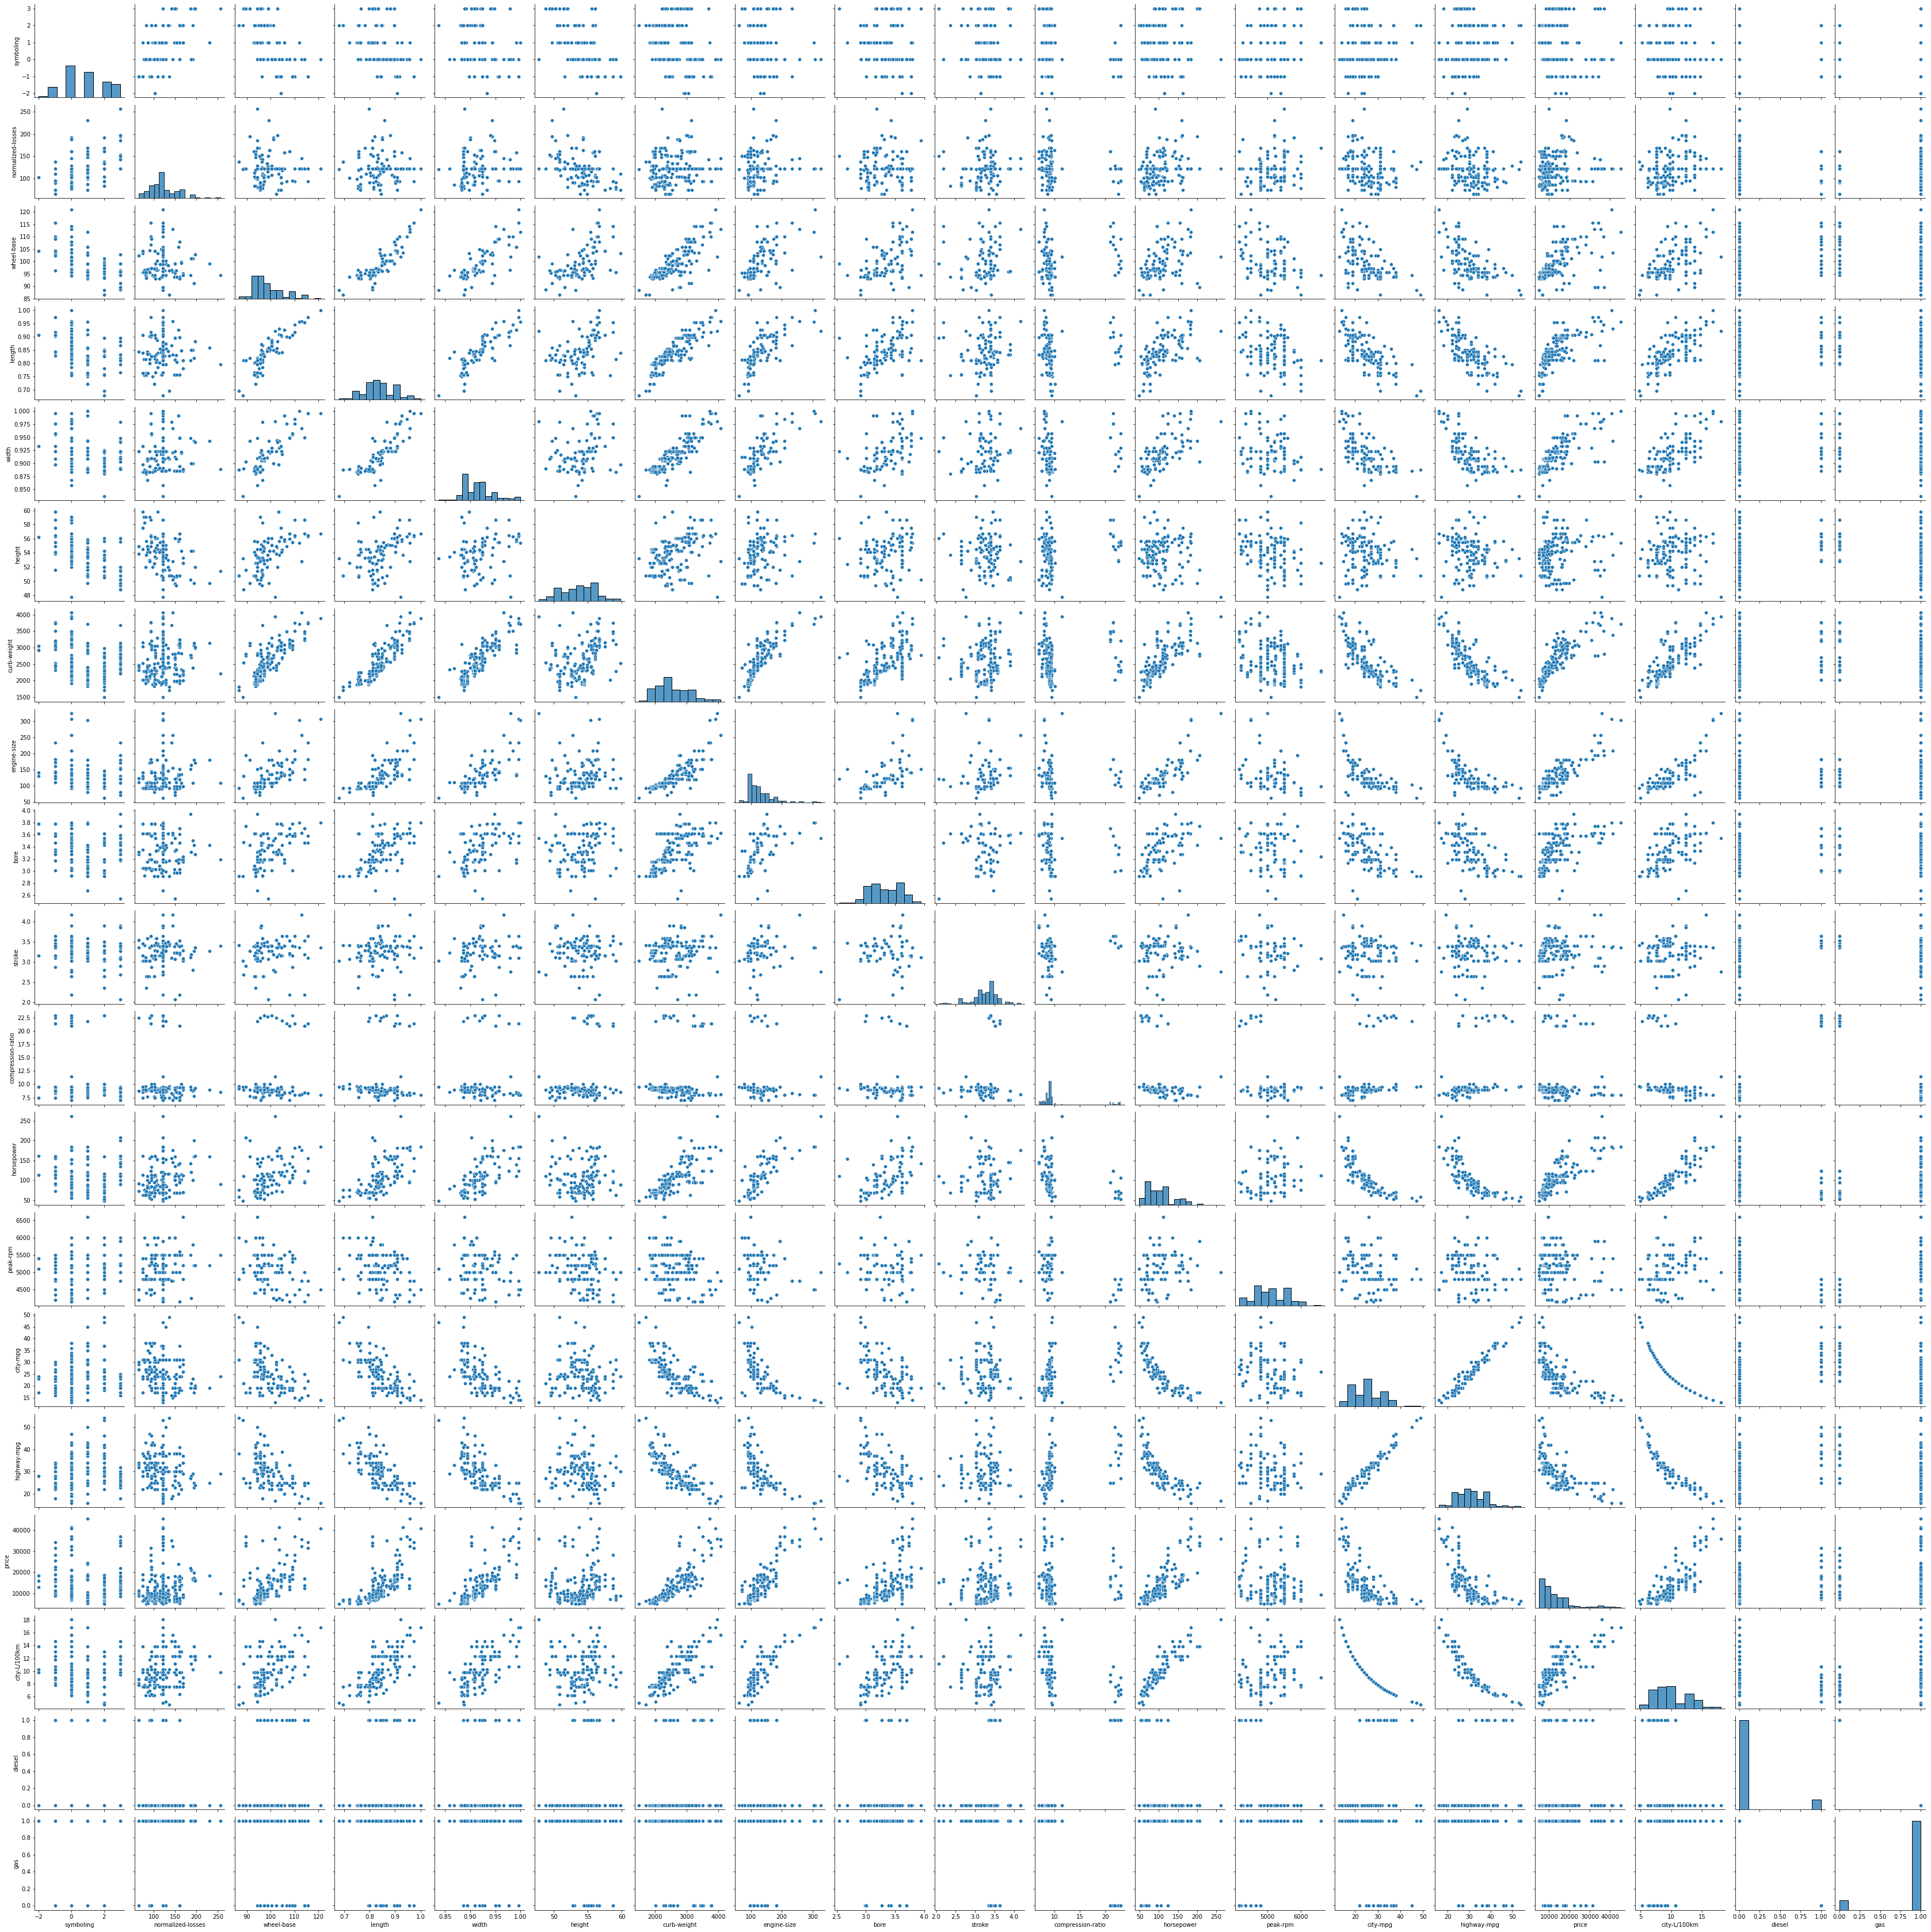

In [6]:
#Dibujamos un correlograma
sns.pairplot(data)
plt.show()

Parece que el precio se puede modelizar bien con un polinómio de segundo grado con las siguientes variables: curb-wight, engine-size, horsepower, city-mpg, highway-mpg. 

## Regresion Polinómica Simple

Vamos a realizar la regresion con la variables horsepower

### 1- Definir las variables

In [7]:
x = data[['horsepower']]
y = data['price']

### 2- Establecer los datos de entrenamiento y testeo

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

### 3- Seleccionar el grado del polinómio

In [9]:
polinomiog2 = PolynomialFeatures(degree=2)

### 4- Ajustar los datos al polinómio

In [10]:
x_train_p2 = polinomiog2.fit_transform(x_train)
x_test_p2 = polinomiog2.fit_transform(x_test)

### 5- Definir el algoritmo

In [11]:
lr = LinearRegression()

### 6- Entrenar el modelo

In [12]:
lr.fit(x_train_p2, y_train)

LinearRegression()

### 7- Prediccion

In [13]:
y_predichos = lr.predict(x_test_p2)

### 8- Graficamos

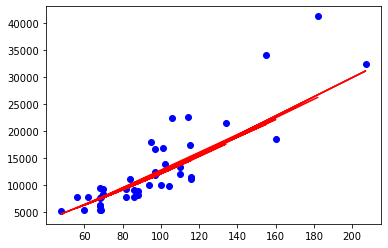

In [14]:
plt.scatter(x_test, y_test, color='blue')
plt.plot(x_test, y_predichos, color='red')
plt.show()

### 9- Obtenemos los parámetros de la funcion

In [15]:
coeficentes = lr.coef_
interseccion = lr.intercept_
precision_entrenamiento = lr.score(x_train_p2, y_train)
print(coeficentes,interseccion, precision_entrenamiento)

[  0.        110.5243833   0.2200707] -1121.720872396514 0.6413050590031493


## Regresion Polinómica Múltiple
Vamos a probar a crear una relación polinómica múltiple con todas las variables señaladas antes(curb-wight, engine-size, horsepower, city-mpg, highway-mpg)

In [16]:
X = data[['horsepower', 'curb-weight', 'engine-size', 'city-mpg','highway-mpg']]

### 2- Establecer los datos de entrenamiento y testeo

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)


### 3- Seleccionar el grado del polinómio

In [18]:
polinomiog2 = PolynomialFeatures(degree=2)

x_train_p2 = polinomiog2.fit_transform(x_train)
x_test_p2 = polinomiog2.fit_transform(x_test)### 4- Ajustar los datos al polinómio

In [19]:
X_train_p2 = polinomiog2.fit_transform(X_train)
X_test_p2 = polinomiog2.fit_transform(X_test)

### 5- Definir el algoritmo

In [20]:
lr = LinearRegression()

### 6- Entrenar el modelo

In [21]:
lr.fit(X_train_p2, y_train)

LinearRegression()

### 7- Prediccion

In [22]:
y_predichos = lr.predict(X_test_p2)

### 8- Calculamos los parámetros del modelo

In [23]:
coeficentes = lr.coef_
interseccion = lr.intercept_
precision_entrenamiento = lr.score(X_train_p2, y_train)
print(coeficentes,interseccion, precision_entrenamiento)

[ 0.00000000e+00  5.92144615e+02 -7.01641389e+00 -1.98025784e+02
  4.12488875e+03 -3.20362796e+03 -2.31035690e-01 -6.40971488e-02
 -1.29211158e+00 -3.52256662e+01  2.13824067e+01  3.81512597e-03
  1.82658605e-02  1.80627083e+00 -1.56073038e+00  9.28635463e-01
 -3.92885993e+01  3.52581504e+01 -1.35652864e+02  1.89255100e+02
 -6.09191816e+01] -6531.000139050197 0.873644014019277
